# STOCK PRICES PREDICTION SYSTEM WITH TIMESERIES

## Dataset Description

#### Context<br>
High-quality financial data is expensive to acquire and is therefore rarely shared for free. Here I provide the full historical daily price and volume data for all US-based stocks. It's one of the best datasets of its kind that can be obtained online.<br>

#### Content<br>
The data (last updated 11/10/2017) is presented in CSV format as follows: Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

Importing most useful and required libraries for this project.

In [2]:
warnings.filterwarnings('ignore')


This will ignore most of the warnings for example deprecated warnings.

In [3]:
df=pd.read_csv('aal.csv')


Importing the stock data which we will use to implement and test our TimeSeries model.

In [4]:
df.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,2013-12-10,23.698,24.345,23.610,24.064,18043837,0
1,2013-12-11,24.607,26.288,24.539,25.139,43224764,0
2,2013-12-12,25.342,25.832,24.616,24.616,20749989,0
3,2013-12-13,24.771,25.437,24.684,25.369,12588700,0
4,2013-12-16,25.749,25.888,25.485,25.739,17136729,0


In [5]:
df.tail()


,Date,Open,High,Low,Close,Volume,OpenInt
984,2017-11-06,47.356,47.995,47.177,47.406,4258497,0
985,2017-11-07,47.406,47.406,46.299,46.358,3763615,0
986,2017-11-08,46.319,46.877,45.740,46.269,3205573,0
987,2017-11-09,45.750,46.249,45.261,45.670,3567014,0
988,2017-11-10,45.640,46.120,45.560,45.820,2433022,0


In [6]:
df.isnull().values.any()


False

Checking if the dataset contains any NaN values or missing values. Here, the dataset is complete.

In [7]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])

In [8]:
from datetime import datetime
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2013-12-10,23.698,24.345,23.610,24.064,18043837,0
2013-12-11,24.607,26.288,24.539,25.139,43224764,0
2013-12-12,25.342,25.832,24.616,24.616,20749989,0
2013-12-13,24.771,25.437,24.684,25.369,12588700,0
2013-12-16,25.749,25.888,25.485,25.739,17136729,0


Date has been made the index of the dataframe. It will make it easier to distinguish data than with serial number.

In [9]:
df.describe()


,Open,High,Low,Close,Volume,OpenInt
count,989.000000,989.000000,989.000000,989.000000,9.890000e+02,989.0
mean,41.150250,41.751690,40.537996,41.150520,1.004541e+07,0.0
std,6.344948,6.346726,6.284963,6.304682,6.971825e+06,0.0
min,23.698000,24.345000,23.610000,23.967000,2.246383e+06,0.0
25%,36.770000,37.343000,36.143000,36.809000,6.326115e+06,0.0
50%,41.241000,41.741000,40.594000,41.231000,8.685476e+06,0.0
75%,46.265000,46.960000,45.695000,46.315000,1.189551e+07,0.0
max,54.333000,54.634000,53.624000,54.317000,1.414300e+08,0.0


In [10]:
df.shape

(989, 6)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Closing Price vs Date Graph')

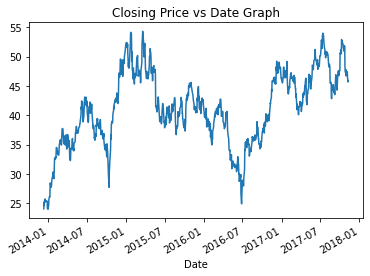

In [11]:
df['Close'].plot()
plt.title('Closing Price vs Date Graph')


The graph plots all the values given in the 'Close' column of the dataframe.

In [12]:
df2= pd.read_csv('aal.csv')


In [13]:
df2.drop(['Date','OpenInt'], axis = 1, inplace = True)



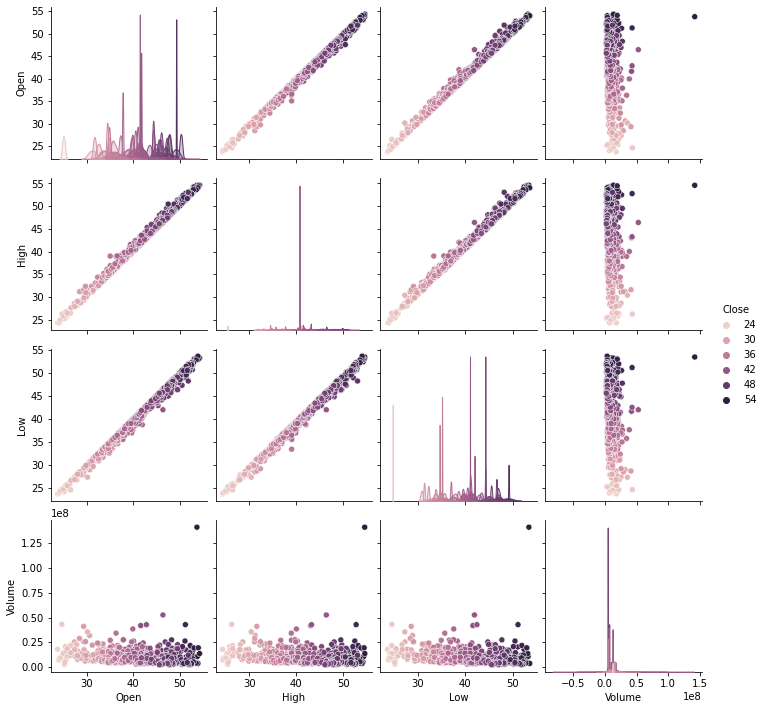

In [14]:
sns.pairplot(df2,hue="Close")#,palette='Set1')


The plot does kind of shows some sort of relation between the variables. We all know the in Stock Market opening price of the day, closing price of the day, highest and lowest prices of the day don't really differ that much on that particular day. Therefore, it is giving plot suggesting a linear relation between them.

In [15]:
df2.corr(method='pearson')


,Open,High,Low,Close,Volume
Open,1.000000,0.996989,0.996032,0.992270,-0.141263
High,0.996989,1.000000,0.996051,0.996605,-0.123907
Low,0.996032,0.996051,1.000000,0.996596,-0.165861
Close,0.992270,0.996605,0.996596,1.000000,-0.142598
Volume,-0.141263,-0.123907,-0.165861,-0.142598,1.000000


Just like the sns plot, the correlation shows very high positive correlation between all of the variables except the volume. Volume has negative correlation.

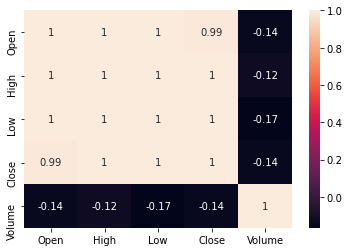

In [16]:
ax = sns.heatmap(df2.corr(), annot=True) 


The heatmap presents the correlation data in form of a matrix representation.

<AxesSubplot:xlabel='Close', ylabel='Density'>

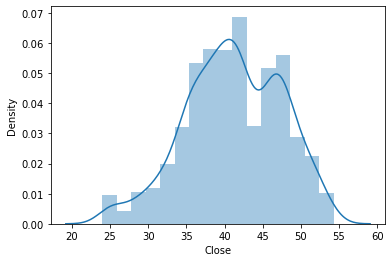

In [17]:
sns.distplot(df2['Close'])


<AxesSubplot:xlabel='Open', ylabel='Density'>

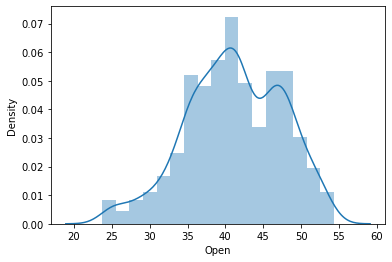

In [18]:
sns.distplot(df2['Open'])


<AxesSubplot:xlabel='High', ylabel='Density'>

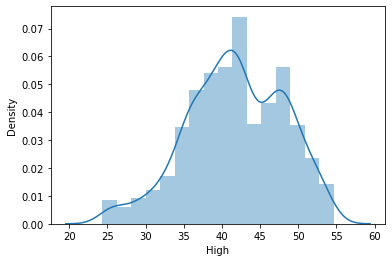

In [19]:
sns.distplot(df2['High'])


<AxesSubplot:xlabel='Low', ylabel='Density'>

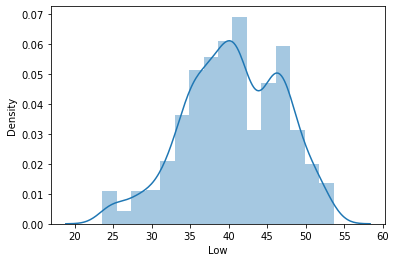

In [20]:
sns.distplot(df2['Low'])


<AxesSubplot:xlabel='Volume', ylabel='Density'>

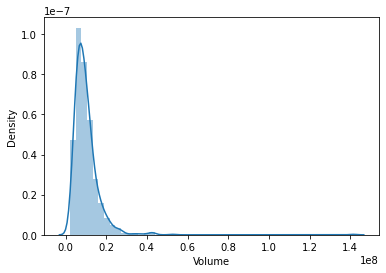

In [21]:
sns.distplot(df2['Volume'])


All the distplot simply plots all the column data separately to give an idea about the distribution of values throughout that particular column.

## Tests to determine stationarity of the data

### Rolling Statistics Test

A rolling analysis of a time series model is often used to assess the model’s stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time. However, the economic environment often changes considerably, and it may not be reasonable to assume that a model’s parameters are constant. A common technique to assess the constancy of a model’s parameters is to compute parameter estimates over a rolling window of a fixed size through the sample. If the parameters are truly constant over the entire sample, then the estimates over the rolling windows should not be too different. If the parameters change at some point during the sample, then the rolling estimates should capture this instability.

In [22]:
rolmean = df['Close'].rolling(window=365).mean()
rolstd = df['Close'].rolling(window=365).std()
print(rolmean)
print(rolstd)

Date
2013-12-10          NaN
2013-12-11          NaN
2013-12-12          NaN
2013-12-13          NaN
2013-12-16          NaN
                ...    
2017-11-06    43.036773
2017-11-07    43.078277
2017-11-08    43.118838
2017-11-09    43.157652
2017-11-10    43.197636
Name: Close, Length: 989, dtype: float64
Date
2013-12-10         NaN
2013-12-11         NaN
2013-12-12         NaN
2013-12-13         NaN
2013-12-16         NaN
                ...   
2017-11-06    6.466328
2017-11-07    6.438761
2017-11-08    6.411972
2017-11-09    6.384283
2017-11-10    6.354985
Name: Close, Length: 989, dtype: float64


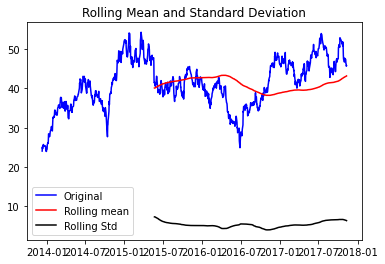

In [23]:
orig = plt.plot(df['Close'], color = 'blue', label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

From the Rolling Statistics Graph, we can see that the Rolling mean as well as the Rolling Standard Deviation are more or less constant or are in an acceptable range to be called as fairly constant. Therefore, according to Rolling Statistics Test if the mean and the standard deviation are constant over a period of time, then the data is stationary.

### Dickey- Fuller test


The Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.<br>
Null Hypothesis, H0: It is non stationary <br>
Alternate Hypothesis, H1: It is stationary

In [24]:
from statsmodels.tsa.stattools import adfuller


def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df['Close'])


ADF Test Statistic : -3.02981606236935
p-value : 0.032202223581412774
#Lags Used : 1
Number of Observations Used : 987
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


As we can see, p-value is lesser than 0.05, which means the data is stationary and time series can be implemented for it. Time Series forecasting gives better results only when stationary data is used. 

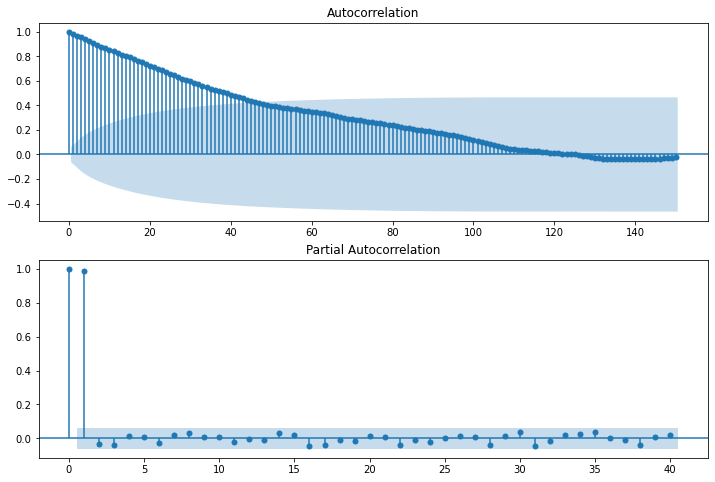

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close'].iloc[:],lags=150,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close'].iloc[:],lags=40,ax=ax2)

ARIMA model requires p, d and q values in order to get the most efficient results.<br>
For p, autocorrelation graph must be seen. Here, we need to check for how many lags does the graph decrease exponentially. As we can see, the graph does decrease but it is in a rather linear manner, it is not exponential decrease. Therefore only the 1st point will be considered as following this rule. Thus, p = 1. <br> <br>
For d, we know that the data is stationary. d represents the number of differentiation performed in order to make non stationary data as stationary. As the data is already stationary, d = 0.<br><br>
For q, Partial autocorrelation graph must be seen. Here we need to see after how many lags the graph decreases suddenly and never rise again to that level. We can see after 2 points, the graph suddenly gets very low and remains very low throughout. Therefore, q = 2.<br><br>

Thus ARIMA model's order(p,d,q) = order(1,0,2) .

## Testing Accuracy of the Model

### Graphical Method

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:xlabel='Date'>

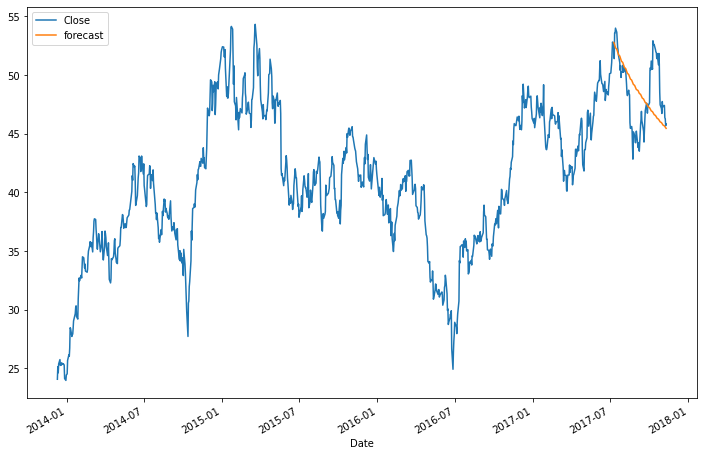

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Close'],order=(1,0,2))
model_fit=model.fit()
model_fit.summary()
df['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))

This graph is representing the actual 'Close' graph with the predicted graph made with the ARIMA model for the datapoint 900 to 988. The predicted results are very similar to the original data, therefore this model is optimal and can be used for stock prices prediction effectively. <br><br>

The yellow line shows the predicted data while the blue line represents the actual data drawn with the imported csv file.

### R-squared Method

In [28]:
train= df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(959, 7) (30, 7)


In [29]:
df.drop(['Open', 'High','Low','OpenInt','Volume','forecast'], axis = 1, inplace = True)
df

,Close
Date,
2013-12-10,24.064
2013-12-11,25.139
2013-12-12,24.616
2013-12-13,25.369
2013-12-16,25.739
...,...
2017-11-06,47.406
2017-11-07,46.358
2017-11-08,46.269


In [30]:
start = len(train)
end = len(train)+len(test)-1
pred = model_fit.predict(start=start,end = end, typ= 'levels')
print(pred)

Date
2017-10-02    47.344589
2017-10-03    47.571318
2017-10-04    50.481942
2017-10-05    50.625831
2017-10-06    50.342928
2017-10-09    51.124806
2017-10-10    50.378850
2017-10-11    52.920597
2017-10-12    52.669923
2017-10-13    52.397775
2017-10-16    52.469478
2017-10-17    52.025658
2017-10-18    51.824548
2017-10-19    51.803508
2017-10-20    51.264964
2017-10-23    51.721511
2017-10-24    50.731411
2017-10-25    51.758062
2017-10-26    50.791033
2017-10-27    48.251763
2017-10-30    47.253475
2017-10-31    47.043001
2017-11-01    46.629558
2017-11-02    47.716085
2017-11-03    47.198541
2017-11-06    47.267619
2017-11-07    47.348215
2017-11-08    46.241255
2017-11-09    46.174801
2017-11-10    45.585635
dtype: float64


<AxesSubplot:xlabel='Date'>

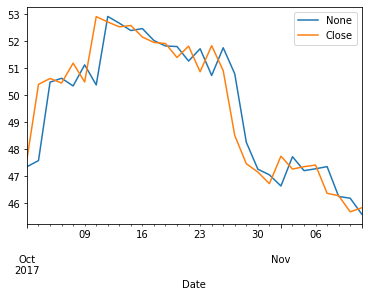

In [31]:
pred.plot(legend = True)
test['Close'].plot(legend=True)

We can see that the predicted graph and test data are very similar. Hence, the model is very good.

In [32]:
from sklearn import metrics
print('R-Squared:',metrics.r2_score(test.drop(['Open', 'High','Low','OpenInt','Volume','forecast'], axis = 1), pred))

R-Squared: 0.8386243740538195


Here, we are using R- squared value as a performance metric in order to determine if the model is a good model or not. The R-Squared is 0.8386243740538195. This is a very high value and thus the model is very good.

In [33]:
print('Absolute RMSE: ',np.sqrt(np.mean(np.power((np.array(test.drop(['Open', 'High','Low','OpenInt','Volume','forecast'], axis = 1))-np.array(pred)),2))))

Absolute RMSE:  3.3418960407241736


The absolute root mean square error is 3.3418960407241736 . This is very low error and therefore the model is very good. 

In [34]:
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test.drop(['Open', 'High','Low','OpenInt','Volume','forecast'], axis = 1), pred)))

RMSLE: 0.018947716194872156


Root mean square log error value is just 0.018947716194872156. This is very low error and therefore the model is very good.

## Implementing the model

In [37]:
df

,Close
Date,
2013-12-10,24.064
2013-12-11,25.139
2013-12-12,24.616
2013-12-13,25.369
2013-12-16,25.739
...,...
2017-11-06,47.406
2017-11-07,46.358
2017-11-08,46.269


Dropping the unnecessary columns from the dataframe. As we are only considering 'Close' prediction with our model, therefore 'Open','High','Low','OpenInt','Volume' and 'forecast' are dropped for easy calculation and usage.

### ARIMA Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'Original graph and the ARIMA fitted graph for all data points')

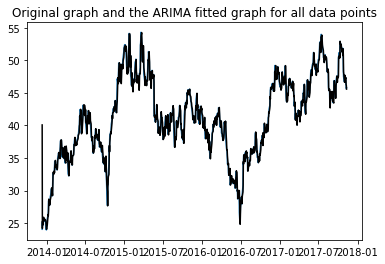

In [38]:
model = ARIMA(df, order=(1,0,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='black')
plt.title('Original graph and the ARIMA fitted graph for all data points')

Here the original graph is represented by a blue line and the ARIMA fitted graph is shown overlapping with the original graph with black line on top. <br><br>

The model is fitted with all datapoints of the given dataframe or the stock prices past data.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


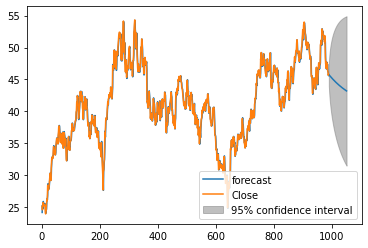

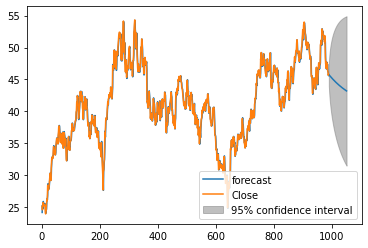

In [39]:
results_ARIMA.plot_predict(1,1050)


In [40]:
results_ARIMA.forecast(steps=60)

(array([45.76019258, 45.71315669, 45.6581814 , 45.60374321, 45.54983687,
        45.4964572 , 45.44359903, 45.39125728, 45.33942691, 45.28810291,
        45.23728033, 45.18695429, 45.13711993, 45.08777244, 45.03890707,
        44.99051911, 44.94260389, 44.89515679, 44.84817325, 44.80164873,
        44.75557875, 44.70995887, 44.66478469, 44.62005185, 44.57575604,
        44.531893  , 44.4884585 , 44.44544835, 44.4028584 , 44.36068454,
        44.31892272, 44.27756891, 44.23661912, 44.1960694 , 44.15591585,
        44.11615459, 44.07678179, 44.03779366, 43.99918644, 43.96095641,
        43.92309988, 43.8856132 , 43.84849277, 43.81173499, 43.77533633,
        43.73929329, 43.70360237, 43.66826016, 43.63326323, 43.59860822,
        43.56429178, 43.53031061, 43.49666143, 43.463341  , 43.4303461 ,
        43.39767357, 43.36532023, 43.33328299, 43.30155874, 43.27014444]),
 array([0.90526004, 1.31345041, 1.63566336, 1.89925262, 2.12621939,
        2.32737879, 2.50901482, 2.67517058, 2.82863411

## Result

The model accuracy was tested and it was fairly good. The final output of the model represented future predicted stock prices graphically as well as in points. The model is a good model.

# CUSTOM FUNCTIONS 

In [129]:
def highPrediction():
    newdf = pd.read_csv('aal.csv')
    newdf['Date'] = pd.to_datetime(newdf['Date'],infer_datetime_format=True)
    newdf = newdf.set_index(['Date'])
    from datetime import datetime
    newdf.head()
    
    model=ARIMA(newdf['High'],order=(1,0,2))
    model_fit=model.fit()
    model_fit.summary()
    newdf['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
    
    newdf.drop(['Open', 'Close','Low','OpenInt','Volume','forecast'], axis = 1, inplace = True)
    
    model = ARIMA(newdf, order=(1,0,2))
    results_ARIMA = model.fit(disp=-1)
    
    results_ARIMA.plot_predict(1,1050)
    
    

In [130]:
def closePrediction():
    newdf = pd.read_csv('aal.csv')
    newdf['Date'] = pd.to_datetime(newdf['Date'],infer_datetime_format=True)
    newdf = newdf.set_index(['Date'])
    from datetime import datetime
    newdf.head()
    
    model=ARIMA(newdf['Close'],order=(1,0,2))
    model_fit=model.fit()
    model_fit.summary()
    newdf['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
    
    newdf.drop(['Open', 'High','Low','OpenInt','Volume','forecast'], axis = 1, inplace = True)
    
    model = ARIMA(newdf, order=(1,0,2))
    results_ARIMA = model.fit(disp=-1)
    
    results_ARIMA.plot_predict(1,1050)

In [131]:
def lowPrediction():
    newdf = pd.read_csv('aal.csv')
    newdf['Date'] = pd.to_datetime(newdf['Date'],infer_datetime_format=True)
    newdf = newdf.set_index(['Date'])
    from datetime import datetime
    newdf.head()
    
    model=ARIMA(newdf['Low'],order=(1,0,2))
    model_fit=model.fit()
    model_fit.summary()
    newdf['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
    
    newdf.drop(['Open', 'High','Close','OpenInt','Volume','forecast'], axis = 1, inplace = True)
    
    model = ARIMA(newdf, order=(1,0,2))
    results_ARIMA = model.fit(disp=-1)
    
    results_ARIMA.plot_predict(1,1050)

In [132]:
def openPrediction():
    newdf = pd.read_csv('aal.csv')
    newdf['Date'] = pd.to_datetime(newdf['Date'],infer_datetime_format=True)
    newdf = newdf.set_index(['Date'])
    from datetime import datetime
    newdf.head()
    
    model=ARIMA(newdf['Open'],order=(1,0,2))
    model_fit=model.fit()
    model_fit.summary()
    newdf['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
    
    newdf.drop(['Low', 'High','Close','OpenInt','Volume','forecast'], axis = 1, inplace = True)
    
    model = ARIMA(newdf, order=(1,0,2))
    results_ARIMA = model.fit(disp=-1)
    
    results_ARIMA.plot_predict(1,1050)

In [133]:
def volumePrediction():
    newdf = pd.read_csv('aal.csv')
    newdf['Date'] = pd.to_datetime(newdf['Date'],infer_datetime_format=True)
    newdf = newdf.set_index(['Date'])
    from datetime import datetime
    newdf.head()
    
    model=ARIMA(newdf['Volume'],order=(1,0,2))
    model_fit=model.fit()
    model_fit.summary()
    newdf['forecast']=model_fit.predict(start=900, end= 988, dynamic=True)
    
    newdf.drop(['Open', 'High','Close','OpenInt','Low','forecast'], axis = 1, inplace = True)
    
    model = ARIMA(newdf, order=(1,0,2))
    results_ARIMA_vol = model.fit(disp=-1)
    
    results_ARIMA_vol.plot_predict(1,1050)

Type the required number to predict the respective fields:
Type 1 for Close Price
Type 2 for Open Price
Type 3 for High Price
Type 4 for Low Price
Type 5 for Volume
Enter a number from 1 - 5 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No

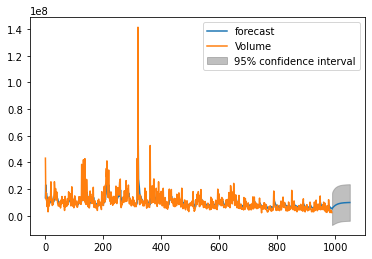

In [137]:
print("Type the required number to predict the respective fields:")
print("Type 1 for Close Price")
print("Type 2 for Open Price")
print("Type 3 for High Price")
print("Type 4 for Low Price")
print("Type 5 for Volume")

option = int(input("Enter a number from 1 - 5 "))

if option == 1:
    closePrediction()
elif option == 2:
    openPrediction()
elif option == 3:
    highPrediction()
elif option == 4:
    lowPrediction()
elif option == 5:
    volumePrediction()
else:
    print("Wrong Input")